# Ames, Iowa : Predicting Sales Prices - Support Vector Regression modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from LR_helper import cat_column_combine_vars, num_new_features,\
label_encode_features, model_results, cat_new_features, std_num_cols
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,\
MinMaxScaler, MaxAbsScaler, FunctionTransformer, PowerTransformer
from sklearn.svm import SVR
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

### Loading cleaned training and testing datasets:-

In [2]:
train_df = pd.read_csv("clean_train.csv",index_col=0)
test_df = pd.read_csv("clean_test.csv",index_col=0)
print(train_df.shape)
print(test_df.shape)

(1453, 80)
(1457, 79)


### Creating new numerical variables, combining variables and creating new categorical variables:-

In [3]:
# Creating new numerical variable features:-
num_new_features(train_df)
num_new_features(test_df)

# Combining categories in some categorical features:-
cat_column_combine_vars(train_df)
cat_column_combine_vars(test_df)

# Creating new categorical variable features:-
cat_new_features(train_df)
cat_new_features(test_df)

In [4]:
print(train_df.shape)
print(test_df.shape)

(1453, 88)
(1457, 87)


### Dropping some features with high multi-collinearity

In [5]:
train_df = train_df.drop(['RoofStyle','Exterior1st','Exterior2nd','GarageType',\
                          'HouseStyle', 'MSSubClass','MSZoning','MasVnrType'], axis=1)

test_df = test_df.drop(['RoofStyle','Exterior1st','Exterior2nd','GarageType',\
                          'HouseStyle', 'MSSubClass','MSZoning','MasVnrType'], axis=1)

### Label encoding categorical features (all dataframes):

In [6]:
#Label encoding via helper functions:-

label_encode_features(train_df)
label_encode_features(test_df)

### OneHot encoding categorical features (all dataframes):

In [7]:
col_list = ['Street', 'Alley', 'LandContour','Condition1', 'Condition2',\
            'Utilities', 'LotConfig','Neighborhood', 'GarageYrBlt',\
            'BldgType', 'YearBuilt', 'YearRemodAdd', 'RoofMatl', 'Foundation',\
            'CentralAir','Heating', 'Electrical', 'Functional','YrSold',\
            'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', \
            'SaleType', 'SaleCondition','remod_y_n']

train_df = pd.get_dummies(data=train_df, columns=col_list, drop_first=True)
test_df = pd.get_dummies(data=test_df, columns=col_list, drop_first=True)

### Standardizing numerical columns:

In [8]:
std_num_cols(train_df)
std_num_cols(test_df)

## Support Vector Regression models:

In [9]:
## Separating x and y variables for test-train split (main df)

house_x = train_df.drop(['SalePrice'], axis=1)
house_y = train_df['SalePrice']

# Train test 70:30 split

trainX, testX, trainY, testY = train_test_split(house_x, house_y, random_state=42, test_size=0.3)

### 1) Base model

In [10]:
svr_base1 = SVR()
model_results(trainX, trainY, testX, testY, svr_base1, show = True)

Train R^2 is equal to -0.050
Test R^2 is equal to -0.032
The intercept is 163999.661
RSS is equal to 6520907840989.916
Train RMSE is equal to 80074.374
Test RMSE is equal to 74321.544
The training error is: 1.04963
The test     error is: 1.03183


[1.0496261339375368, 1.0318317777703294]

In [11]:
svr_base2 = SVR(epsilon = 1e-4, gamma=1)
model_results(trainX, trainY, testX, testY, svr_base2, show = True)

Train R^2 is equal to -0.050
Test R^2 is equal to -0.032
The intercept is 163990.000
RSS is equal to 6522866629507.349
Train RMSE is equal to 80086.400
Test RMSE is equal to 74335.080
The training error is: 1.04994
The test     error is: 1.03221


[1.0499414267876872, 1.032207659752596]

### 2. Log-transforming y variable only:

In [12]:
svr_logy1 = SVR()
model_results(trainX, np.log(trainY), testX, np.log(testY), svr_logy1, show = True)

Train R^2 is equal to 0.745
Test R^2 is equal to 0.743
The intercept is 12.335
RSS is equal to 41.181
Train RMSE is equal to 0.201
Test RMSE is equal to 0.197
The training error is: 0.25455
The test     error is: 0.25691


[0.25454769339987093, 0.2569140854383618]

In [13]:
svr_logy2 = SVR(epsilon = 1e-4, gamma=1)
model_results(trainX, np.log(trainY), testX, np.log(testY), svr_logy1, show = True)

Train R^2 is equal to 0.745
Test R^2 is equal to 0.743
The intercept is 12.335
RSS is equal to 41.181
Train RMSE is equal to 0.201
Test RMSE is equal to 0.197
The training error is: 0.25455
The test     error is: 0.25691


[0.25454769339987093, 0.2569140854383618]

### 3. Log-transforming x and y variables:

In [14]:
# Applying log-transformation on the x features

trfm = FunctionTransformer(func=np.log1p)

trainX_trans = trfm.fit_transform(trainX)
testX_trans = trfm.fit_transform(testX)

In [15]:
svr_log2 = SVR(epsilon = 1e-4, gamma=1)
model_results(trainX_trans, np.log(trainY), testX_trans, np.log(testY), svr_log2, show = True)

Train R^2 is equal to 0.993
Test R^2 is equal to 0.000
The intercept is 12.029
RSS is equal to 1.186
Train RMSE is equal to 0.034
Test RMSE is equal to 0.390
The training error is: 0.00733
The test     error is: 0.99991


[0.007333130880404104, 0.9999127903953443]

In [16]:
# Soft margin regressor

svr_soft = SVR(epsilon=1, gamma=1, C=1e-4)
model_results(trainX_trans, np.log(trainY), testX_trans, np.log(testY), svr_soft, show = True)

Train R^2 is equal to -0.003
Test R^2 is equal to -0.000
The intercept is 12.005
RSS is equal to 162.283
Train RMSE is equal to 0.399
Test RMSE is equal to 0.390
The training error is: 1.00310
The test     error is: 1.00006


[1.003100618862202, 1.0000580205403984]

In [17]:
# Hard margin regressor

svr_hard = SVR(epsilon=1, gamma=1, C=1e4)
model_results(trainX_trans, np.log(trainY), testX_trans, np.log(testY), svr_hard, show = True)

Train R^2 is equal to 0.035
Test R^2 is equal to -0.005
The intercept is 11.981
RSS is equal to 156.138
Train RMSE is equal to 0.392
Test RMSE is equal to 0.391
The training error is: 0.96512
The test     error is: 1.00506


[0.9651155359021625, 1.005064479114991]

In [18]:
svr_log1 = SVR(C=5, epsilon=1e-2)
model_results(trainX_trans, np.log(trainY), testX_trans, np.log(testY), svr_log1, show = True)

Train R^2 is equal to 0.954
Test R^2 is equal to 0.915
The intercept is 13.261
RSS is equal to 7.377
Train RMSE is equal to 0.085
Test RMSE is equal to 0.114
The training error is: 0.04560
The test     error is: 0.08533


[0.04559885534861996, 0.08533340809778922]

## Plotting errors and R^2 values for different C values for SVR model:

In [19]:
C_range = range(1, 20, 1)  
train_error = []
test_error = []
train_r2 = []
test_r2 = []

for C in C_range:
    svr = SVR()
    svr.set_params(C=C)
    svr.fit(trainX_trans, np.log(trainY))
    train_error.append(1 - svr.score(trainX_trans, np.log(trainY)))
    test_error.append(1 - svr.score(testX_trans, np.log(testY)))
    train_r2.append(svr.score(trainX_trans, np.log(trainY)))
    test_r2.append(svr.score(testX_trans, np.log(testY)))

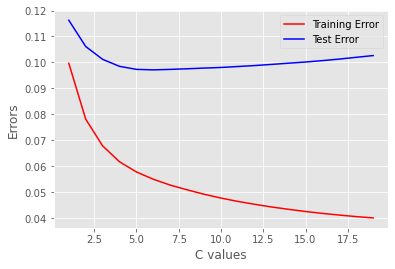

In [20]:
plt.plot(C_range, train_error, c='red', label='Training Error')
plt.plot(C_range, test_error, c='blue', label='Test Error')
plt.ylabel('Errors')
plt.xlabel('C values')
plt.legend()
plt.show()

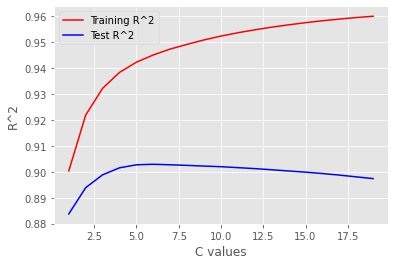

In [21]:
plt.plot(C_range, train_r2, c='red', label='Training R^2')
plt.plot(C_range, test_r2, c='blue', label='Test R^2')
plt.ylabel('R^2')
plt.xlabel('C values')
plt.legend()
plt.show()

## Using C as 5 we will plot errors and R^2 values for different epsilon values:

In [22]:
ep_range = np.linspace(0, 0.2, 1000)  
train_error = []
test_error = []
train_r2 = []
test_r2 = []

for ep in ep_range:
    svr = SVR()
    svr.set_params(C=5, epsilon=ep)
    svr.fit(trainX_trans, np.log(trainY))
    train_error.append(1 - svr.score(trainX_trans, np.log(trainY)))
    test_error.append(1 - svr.score(testX_trans, np.log(testY)))
    train_r2.append(svr.score(trainX_trans, np.log(trainY)))
    test_r2.append(svr.score(testX_trans, np.log(testY)))

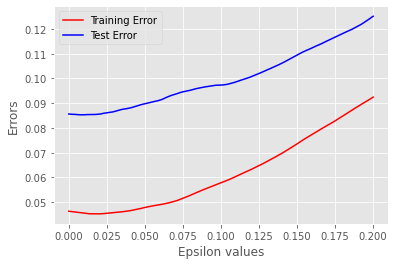

In [27]:
plt.plot(ep_range, train_error, c='red', label='Training Error')
plt.plot(ep_range, test_error, c='blue', label='Test Error')
plt.ylabel('Errors')
plt.xlabel('Epsilon values')
plt.legend()
plt.show()

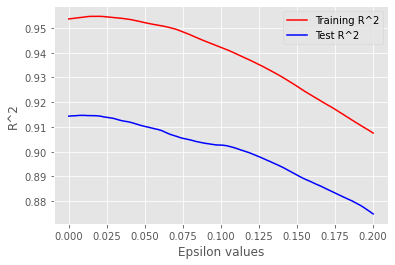

In [28]:
plt.plot(ep_range, train_r2, c='red', label='Training R^2')
plt.plot(ep_range, test_r2, c='blue', label='Test R^2')
plt.ylabel('R^2')
plt.xlabel('Epsilon values')
plt.legend()
plt.show()

## Using Grid Search to select best parameters

In [31]:
# Setting x and y variables

x = trainX_trans
y = np.log(trainY)

In [37]:
# Setting the parameter grid 

svr_fin = SVR(C=5, epsilon=1e-2)

grid_para_svr = [
    {'kernel': ['poly'],
     'degree': [1, 2, 3],
     'gamma': np.linspace(1e-3,1,10)},
    {'kernel': ['rbf'],
     'gamma': np.linspace(1e-3,1,10)},
    {'kernel': ['linear']}]

# Running the SVR model through the grid search

svr_grid = GridSearchCV(svr_fin, grid_para_svr, cv=5, return_train_score = True, n_jobs=-1)

svr_grid.fit(x, y)

GridSearchCV(cv=5, estimator=SVR(C=5, epsilon=0.01), n_jobs=-1,
             param_grid=[{'degree': [1, 2, 3],
                          'gamma': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ]),
                          'kernel': ['poly']},
                         {'gamma': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ]),
                          'kernel': ['rbf']},
                         {'kernel': ['linear']}],
             return_train_score=True)

In [40]:
# The best parameters:

svr_grid.best_params_

{'gamma': 0.001, 'kernel': 'rbf'}

In [41]:
# The best scores:

svr_grid.best_score_

0.905306894511092

In [43]:
# Best estimator training/test errors

print("The training error is: %.5f" % (1 - svr_grid.best_estimator_.score(trainX_trans, np.log(trainY))))
print("The test     error is: %.5f" % (1 - svr_grid.best_estimator_.score(testX_trans, np.log(testY))))

The training error is: 0.06125
The test     error is: 0.08632


In [42]:
# Selecting the best model from the Grid Search as the final model

final_svr = svr_grid.best_estimator_

In [45]:
# Checking if all parameters are correct:

final_svr.get_params()

{'C': 5,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.01,
 'gamma': 0.001,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [46]:
# Model results:

model_results(trainX_trans, np.log(trainY), testX_trans, np.log(testY), final_svr, show = True)

Train R^2 is equal to 0.939
Test R^2 is equal to 0.914
The intercept is 13.890
RSS is equal to 9.910
Train RMSE is equal to 0.099
Test RMSE is equal to 0.114
The training error is: 0.06125
The test     error is: 0.08632


[0.06125488618280839, 0.08632254316781596]

In [49]:
final_svr.dual_coef_

array([[ 5.        ,  5.        , -5.        , -2.47501466, -5.        ,
         5.        ,  5.        ,  5.        , -5.        ,  5.        ,
        -5.        , -5.        ,  5.        ,  5.        , -5.        ,
        -5.        , -5.        , -3.53618583, -4.30372519,  5.        ,
        -5.        , -5.        ,  5.        ,  5.        , -0.60524948,
         2.07171739, -5.        ,  0.74363947,  2.37212657, -4.83404022,
        -4.34956961, -0.12468224,  2.84518712, -5.        , -5.        ,
         4.75725669, -5.        ,  5.        ,  5.        ,  5.        ,
         3.20242718, -5.        , -5.        ,  5.        , -2.49778066,
        -5.        ,  5.        ,  5.        ,  5.        , -5.        ,
        -4.16043801,  2.88119896,  5.        ,  5.        ,  5.        ,
        -5.        ,  2.79830084, -4.38179344, -5.        , -5.        ,
        -5.        , -5.        , -5.        ,  5.        ,  5.        ,
         2.48247329,  5.        ,  2.77558266, -5. 

In [52]:
# Using lasso(alpha=0.01) to select features

selected_feat = ['LotArea', 'LotShape', 'OverallQual', 'MasVnrArea', 'BsmtQual',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'KitchenQual',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF',
       'sold_age', 'yr_since_remod', 'Encl_Porch_tot', 'Usable_Space']

In [53]:
# Model results:

model_results(trainX_trans[selected_feat], np.log(trainY), testX_trans[selected_feat], np.log(testY), final_svr, show = True)

Train R^2 is equal to 0.885
Test R^2 is equal to 0.879
The intercept is 13.385
RSS is equal to 18.529
Train RMSE is equal to 0.135
Test RMSE is equal to 0.136
The training error is: 0.11453
The test     error is: 0.12111


[0.11453300946033207, 0.12110822823610634]

In [54]:
trfm = PowerTransformer(method='box-cox')
trainY_trans = trfm.fit_transform(pd.DataFrame(trainY))
testY_trans = trfm.fit_transform(pd.DataFrame(testY))

model_results(trainX_trans, trainY_trans, testX_trans, testY_trans, final_svr, show = True)

Train R^2 is equal to 0.912
Test R^2 is equal to 0.899
The intercept is 3.706
RSS is equal to 1853259.562
Train RMSE is equal to 0.296
Test RMSE is equal to 0.317
The training error is: 0.08751
The test     error is: 0.10079


[0.08751265450982149, 0.10078871228462627]